In [1]:
import sys
from matplotlib import pyplot
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    
    # return normalized images
    return train_norm, test_norm

In [3]:
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,
                                 horizontal_flip=True)
    # prepare iterator
    it_train = datagen.flow(trainX, trainY, batch_size=64)
    # fit model
    steps = int(trainX.shape[0] / 64)
    history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=100,
                                  validation_data=(testX, testY), verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    
    # entry point, run the test harness
    run_test_harness()

In [4]:
# load train and test dataset
def load_cifar10_dataset_no_categorical():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    
    return trainX, trainY, testX, testY

def load_cifar10_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    
    return trainX, trainY, testX, testY

In [5]:
def define_model(optimizer_learning_rate=0.001, optimizer_learning_momentum=0.9, loss_function='categorical_crossentropy'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_uniform',
    padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
    padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',
    padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',
    padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',
    padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',
    padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=optimizer_learning_rate, momentum=optimizer_learning_momentum)
    model.compile(optimizer=opt, loss=loss_function, metrics=['accuracy'])
    
    return model

In [39]:
# define cnn model
def define_VGG1_model(loss_function = 'categorical_crossentropy'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
    padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
    padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss=loss_function, metrics=['accuracy'])
    
    return model

In [6]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, model, n_folds=5):
    from tqdm import tqdm
    
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in tqdm(kfold.split(dataX)):
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], \
                                       dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX,
                            testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # append scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [7]:
trainX, trainY, testX, testY = load_cifar10_dataset_no_categorical()
trainY[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [8]:
images_number = len(trainX)
image_dimension = (len(trainX[6]), len(trainX[6])) 
image_color_channels = len(trainX[6][7][30])

print('images_number: {}, image_dimension: {}, image_color_channels: {}'.format(images_number, 
                                                                                image_dimension, image_color_channels))

images_number: 50000, image_dimension: (32, 32), image_color_channels: 3


In [9]:
trainX[6][31][:5]

array([[183, 153, 102],
       [176, 182, 116],
       [154, 154, 100],
       [132, 136,  77],
       [128, 146,  70]], dtype=uint8)

## Representamos alguna imagen

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


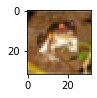

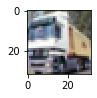

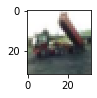

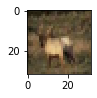

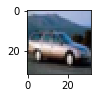

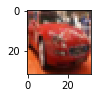

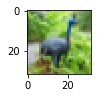

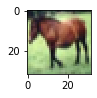

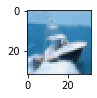

In [118]:
# example of loading the fashion mnist dataset
from matplotlib import pyplot
from keras.datasets import fashion_mnist

'''
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
'''
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
    # show the figure
    pyplot.show()

## <font color='green'> Ahora probamos una validación cruzada para una combinación de hiperparámetros: </font>

In [20]:
trainX, trainY, testX, testY = load_cifar10_dataset_no_categorical()

In [21]:
from sklearn.model_selection import StratifiedKFold

seed = 42
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

In [68]:
instanced_model = define_model(loss_function='sparse_categorical_crossentropy') #'categorical_crossentropy')

In [25]:
from sklearn.model_selection import KFold

scores, histories = evaluate_model(trainX[:1000], trainY[:1000], model=instanced_model)

0it [00:00, ?it/s]

> 13.500


1it [00:25, 25.42s/it]

> 7.500


2it [00:49, 25.12s/it]

> 11.500


3it [01:14, 24.89s/it]

> 8.500


4it [01:38, 24.82s/it]

> 10.000


5it [02:03, 24.75s/it]


<font color='blue'> Check: son los scores del modelo con y sin target one-hot-encoding iguales? </font>

In [26]:
no_one_hot_scores = scores
no_one_hot_scores

[0.135, 0.075, 0.115, 0.085, 0.1]

In [16]:
one_hot_scores = scores
one_hot_scores

[0.135, 0.075, 0.115, 0.085, 0.1]

## <font color='green'> Ahora probamos una validación cruzada para una combinación de hiperparámetros con el Keras classifier wrapper: </font>

In [27]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# create model
keras_wrapper_model = KerasClassifier(build_fn=instanced_model, epochs=150, batch_size=10, verbose=0)

Using TensorFlow backend.


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


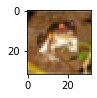

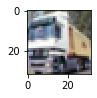

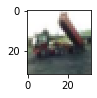

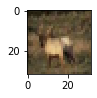

In [28]:
# example of loading the fashion mnist dataset
from matplotlib import pyplot
from keras.datasets import fashion_mnist

'''
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
'''
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))
# plot first few images
for i in range(4):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
    # show the figure
    pyplot.show()

In [29]:
#from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np

#results = cross_val_score(keras_wrapper_model, trainX[:1000], trainY[:1000], cv=kfold, error_score=np.nan, n_jobs=-1)
parameters = {'batch_size':[8, 10]}
clf = GridSearchCV(keras_wrapper_model, parameters)
clf.fit(trainX[:1000], trainY[:1000])
#print(results.mean())

C:\Users\gcabreram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


TypeError: can't pickle _thread._local objects

## PROBAR MANUALMENTE EL PROCESO GRID SEARCH CV

In [40]:
import pandas as pd

trainY[:10].reshape(10, )

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [41]:
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,
                             horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(trainX[:1000], trainY[:1000], batch_size=64)

In [42]:
it_train

## CHECKEO SI LOS DATA AUGMENTED IMAGES PUEDEN TENERSE COMO NUMPY ARRAYS

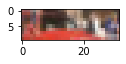

In [52]:
# define subplot
pyplot.subplot(330 + 1)
# plot raw pixel data
pyplot.imshow(trainX[5][:10], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

<font color='pink'> Así comprobamos que la primera dimensión de 'image' corresponde a la height </font>

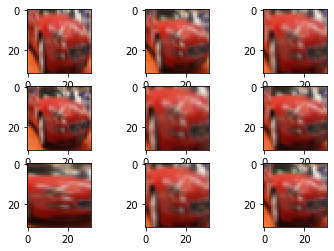

In [43]:
from numpy import expand_dims
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

# convert to numpy array
data = img_to_array(trainX[5])
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    #print(image)
    
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [54]:
last_read_image = image
image_height = len(last_read_image[0])
last_read_image.size # 32*32*3

3072

# Y TENIENDO ASÍ LOS DATOS YA CREO QUE PUEDO HACER MI GRID SEARCH CROSS VAL. FROM SCRATCH, MODELANDO COMO TENGO MÁS ARRIBA CON UNA COMBINACIÓN

### Checkeo el data augm. para una imagen

In [69]:
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(trainX[:5], trainY[:5], batch_size=64)
# fit model
steps = int(trainX[:5].shape[0] / 64)

1
[[[[203.97151   82.322464  72.7372  ]
   [191.10295   87.57028   72.58198 ]
   [181.58067   81.13514   63.439472]
   ...
   [179.74794  156.98917  157.8447  ]
   [162.87932  149.32986  153.08495 ]
   [144.9731   143.0231   147.95049 ]]

  [[197.51337   74.95089   62.561523]
   [187.41109   84.770645  68.37662 ]
   [184.62418   75.69347   59.934433]
   ...
   [175.30157  146.85068  145.32657 ]
   [162.37778  144.66982  147.96584 ]
   [145.32404  137.23796  144.25227 ]]

  [[189.93753   67.12013   51.818916]
   [181.1895    80.09981   62.148186]
   [187.86475   70.57903   56.868855]
   ...
   [167.87206  133.25894  129.43106 ]
   [159.15398  136.87637  140.21263 ]
   [142.84447  127.77441  137.69472 ]]

  ...

  [[234.74876  102.46369   38.616455]
   [227.08292   91.62332   34.919083]
   [172.1326    63.65008   21.718445]
   ...
   [104.668655  34.408455  34.55208 ]
   [ 99.9457    30.617434  29.767292]
   [107.8961    30.535671  19.029016]]

  [[234.1969   100.995766  36.822952]
   [2

'    \n# show the figure\npyplot.show()\n'

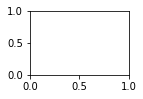

In [60]:
# convert to numpy array
data = img_to_array(trainX[5])
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
for i in range(1):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    
    print(len(batch))
    print(batch)
    
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    
    print(len(image))
    '''
    #print(image)
    
    # plot raw pixel data
    pyplot.imshow(image)
    '''
'''    
# show the figure
pyplot.show()
'''

In [66]:
print(image.size)
print(image.shape)

3072
(32, 32, 3)


In [68]:
print(trainX[5].size)
print(trainX[5].shape)

3072
(32, 32, 3)


## El primer entrenamiento lo hice con datos en formato 'trainX' 'trainY'; ahora haré una dataset similar pero con los datos de imágenes aumentadas

1.- crear dataset de imágenes aumentadas, aumentando cada imagen en bucle y añadiéndola al nuevo dataset <p>
2.- incluir esto en una función <p>
3.- hacer cross-val para varias configuraciones con este nuevo dataset

In [82]:
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
import numpy as np

# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)

augmentations_number = 9
trainX_set = trainX[:10000]
trainY_set = trainY[:10000]

#img_augmented_dataset_shape = np.expand_dims(np.array(img.shape), axis=0)
img_augmented_trainset = ([]) #np.empty((augmentations_number*len(trainX_set), 32, 32, 3))
img_augmented_target = ([]) #np.array([], dtype='int') #np.empty(augmentations_number*len(trainY_set))
i = 0
for img in trainX_set:
    # convert to numpy array
    data = img_to_array(img)
    # expand dimension to one sample
    samples = expand_dims(data, 0)
    # create image data augmentation generator
    datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True) #(zoom_range=[0.5,1.0])
    # prepare iterator
    it = datagen.flow(samples, batch_size=64) #batch_size=1)
    
    for j in range(augmentations_number):
        # define subplot
        #pyplot.subplot(330 + 1 + j)
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        
        img_augmented_trainset.append(image)        
        img_augmented_target.append(trainY_set[i].astype('int'))
        
        #plot raw pixel data
        #pyplot.imshow(image)
    
    i = i+1
    #show the figure
    #pyplot.show()
    
img_augmented_trainset = np.array(img_augmented_trainset)
img_augmented_target = np.array(img_augmented_target)
assert len(img_augmented_trainset) == len(img_augmented_target)

In [83]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, model, n_folds=5):
    from tqdm import tqdm
    from sklearn.model_selection import KFold
    
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    k = 0
    for train_ix, test_ix in tqdm(kfold.split(dataX)):
        print('kfold {}'.format(k))
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], \
                                       dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX,
                            testY), verbose=0) #, steps_per_epoch=steps)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # append scores
        scores.append(acc)
        histories.append(history)
        
        k = k + 1
        
    return model, scores, histories


## <font color='green'> Ahora probamos a entrenar sobre el augmented dataset con cross validation; aquí ya podemos probar varias data aug. con varios models configs. </font>

In [84]:
features_length = len(img_augmented_trainset)
target_length = len(img_augmented_target)
model, scores, histories = evaluate_model(img_augmented_trainset[:int(features_length/10)], 
                                          img_augmented_target[:int(features_length/10)], 
                                          model=instanced_model)















0it [00:00, ?it/s]

kfold 0
> 10.056
















1it [40:34, 2434.45s/it]

kfold 1


KeyboardInterrupt: 

In [85]:
features_length = len(img_augmented_trainset)
target_length = len(img_augmented_target)
model, scores, histories = evaluate_model(img_augmented_trainset[:int(features_length)], 
                                          img_augmented_target[:int(features_length)], 
                                          model=instanced_model)
















0it [00:00, ?it/s]

kfold 0
> 10.122

















1it [3:49:09, 13749.55s/it]

kfold 1


KeyboardInterrupt: 

In [ ]:
scores

## Y seguidamente validación con el resto de datos de test (sin aumentar)

In [59]:
vgg1_instanced_model = define_VGG1_model(loss_function='sparse_categorical_crossentropy')

In [43]:
_, acc = instanced_model.evaluate(trainX[10000:10100], trainY[10000:10100], verbose=0)
acc

0.09

In [55]:
_, acc = vgg1_instanced_model.evaluate(trainX[10000:12000], trainY[10000:12000], verbose=0)
acc

0.096

## Y ahora datos aumentados pero modelo con arquitectura VGG1

In [65]:
vgg1_model, scores, histories = evaluate_model(img_augmented_trainset[10000:12000], img_augmented_target[10000:12000], 
                                               model=vgg1_instanced_model)







0it [00:00, ?it/s]


NameError: name 'steps' is not defined

# PROBAR A QUITAR AUMENTOS DE DATOS QUE PUEDAN AFECTAR

### BASELINE MODEL DE JASON

In [1]:
import tensorflow.keras as keras

In [2]:
x = '000000000000001010000000000000000000000000000111110000000000000000000000000001111000000000000000000000000000111100000000000000000000000000001111000000000000000000000000000111110000000000000000000000000011111100000000000000000000000000111111100000000000000000000000001111111000000000000000000000000011111110000000000000000000000000111111110000000000000000000000011111111100000000000000000000000111111111100000000000000000000001111111111000000000000000000000011111111110000000000000000000001111111111110000000000000000000011111111111100000000000000000000111111011111100000000000000000001111100111110000000000000000000111111000111110000000000000000001111100001111110000000000000000011111000001111100000000000000001111110000011111100000000000000011111000000111111100000000000000111110000000111111000000000000011111100000001111110000000000000111110000000001111110000000000001111100000000011111100000000000111111000000000011111100000000001111110000000000111111110000000011111100000001111111111111100000111111111111111111111111111100011111111111111111111111111111000111111111111111111111111111100001111111111111110000011111100000011111100000000000000111111000000111110000000000000001111110000011111100000000000000001111110000111110000000000000000011111100001111100000000000000000011111000111111000000000000000000111110001111110000000000000000001111110011111100000000000000000011111100111110000000000000000000011111001111100000000000000000000111110011111000000000000000000001111101111110000000000000000000011111111111100000000000000000000011111111110000000000000000000000111111111100000000000000000000001111111110000000000000000000000001110'

In [8]:
from PIL import Image 
import numpy as np

#img = Image.fromarray(np.array(x).reshape(28,28), 'L')
len(x)
np.sqrt(len(x))

40.39801975344831

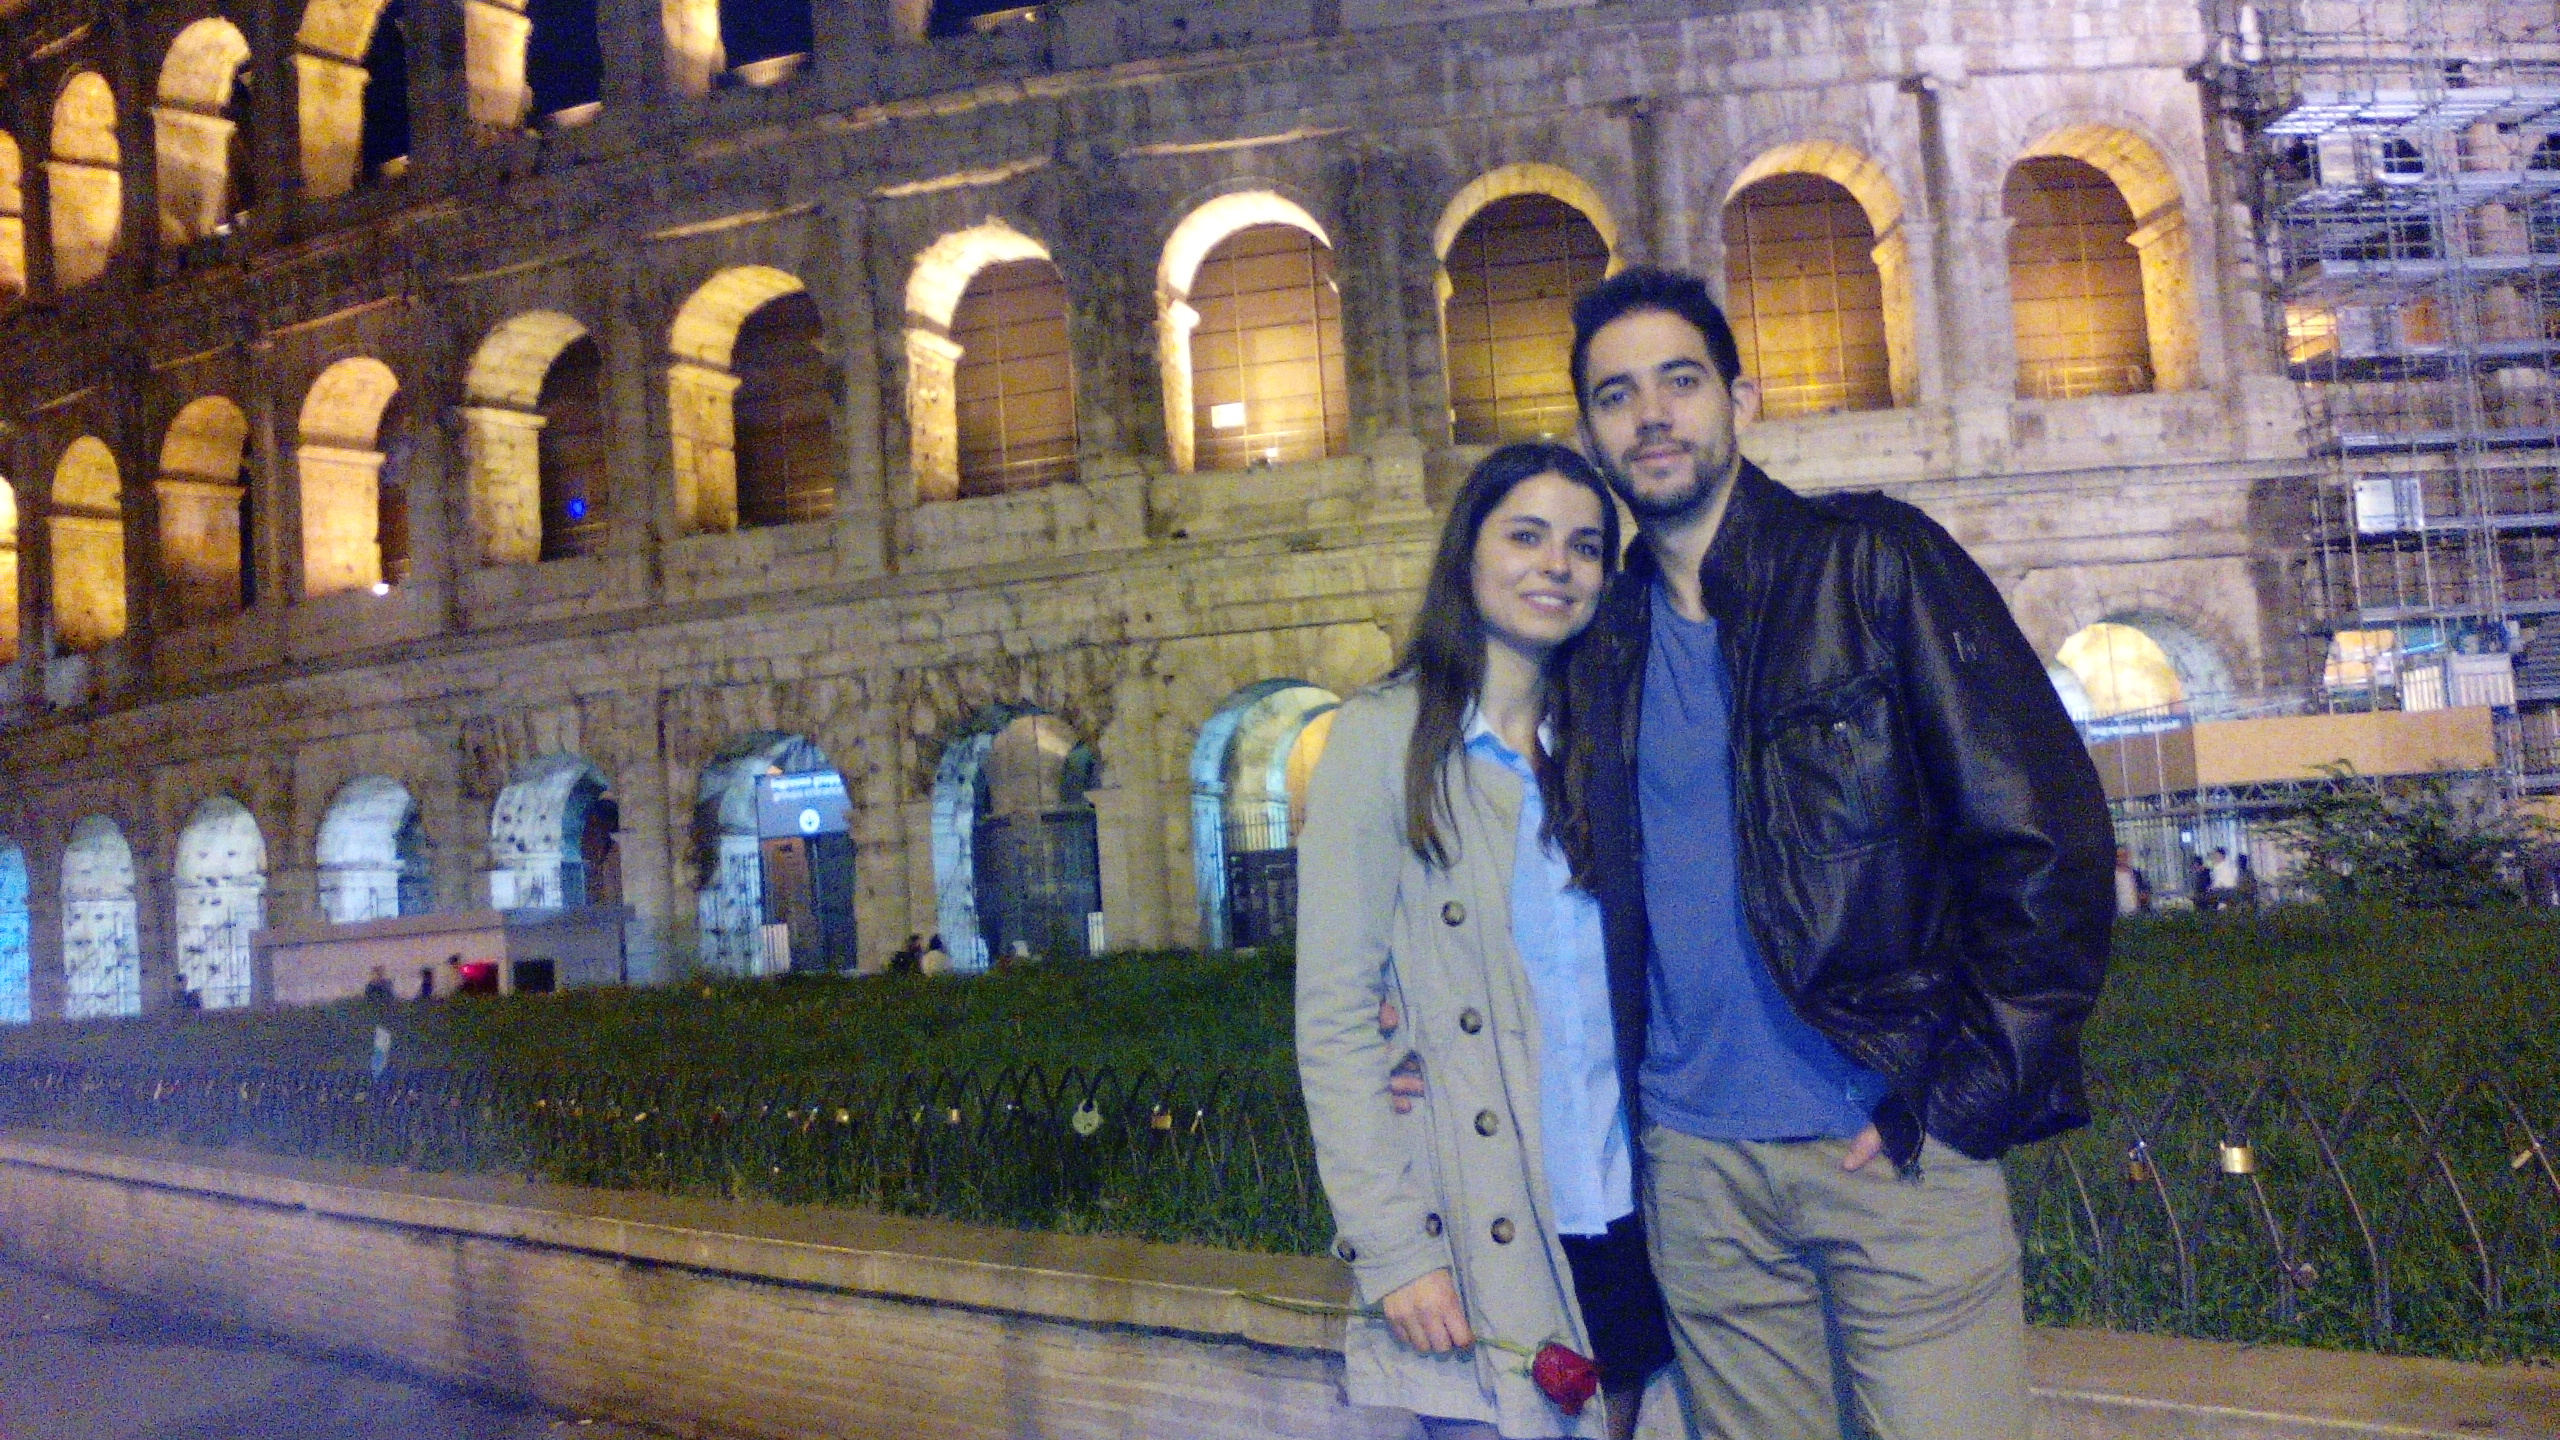

In [79]:
from IPython.display import Image
Image("handwritten_six.PNG", width=3, height=5)
Image("nos_roma.JPG", width=1, height=3)

In [97]:
from PIL import Image
import numpy as np

img = Image.open('handwritten_six.png').convert('L')
img_roma = Image.open('nos_roma.JPG').convert('L')

np_img = np.array(img)
np_img = ~np_img 
np_img[np_img > 0] = 1

np_img_roma = np.array(img_roma)
np_img_roma = ~np_img_roma 
np_img_roma[np_img_roma > 0] = 1


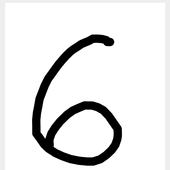

In [88]:
from IPython.display import Image
Image("handwritten_six.PNG", width=3, height=5)

In [98]:
np.sqrt(len(np_img))
len(np_img)
np_img.shape

np_img_roma.shape

(1440, 2560)

In [100]:
import numpy as np 

np_img_roma=np_img_roma.reshape(np_img_roma.shape[0]*np_img_roma.shape[1], ) #(28900, )
np_img_roma.shape

(3686400,)

In [101]:
np.unique(np_img_roma)

array([0, 1], dtype=uint8)

In [103]:
from PIL import Image

img = Image.new('1', (1440, 2560))
data=[int(x) for x in np_img_roma]
img.putdata(data)
img.save('my_nos_roma.png')
img.show()

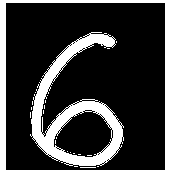

In [69]:
import tensorflow.keras as keras 

keras.preprocessing.image.array_to_img(
    np_img.reshape(170, 170, 1), data_format=None, scale=True, dtype=None
)

In [64]:
'''
keras.preprocessing.image.array_to_img(
    np_img, data_format=None, scale=True, dtype=None
)
'''
from PIL import Image

x = '000000000000001010000000000000000000000000000111110000000000000000000000000001111000000000000000000000000000111100000000000000000000000000001111000000000000000000000000000111110000000000000000000000000011111100000000000000000000000000111111100000000000000000000000001111111000000000000000000000000011111110000000000000000000000000111111110000000000000000000000011111111100000000000000000000000111111111100000000000000000000001111111111000000000000000000000011111111110000000000000000000001111111111110000000000000000000011111111111100000000000000000000111111011111100000000000000000001111100111110000000000000000000111111000111110000000000000000001111100001111110000000000000000011111000001111100000000000000001111110000011111100000000000000011111000000111111100000000000000111110000000111111000000000000011111100000001111110000000000000111110000000001111110000000000001111100000000011111100000000000111111000000000011111100000000001111110000000000111111110000000011111100000001111111111111100000111111111111111111111111111100011111111111111111111111111111000111111111111111111111111111100001111111111111110000011111100000011111100000000000000111111000000111110000000000000001111110000011111100000000000000001111110000111110000000000000000011111100001111100000000000000000011111000111111000000000000000000111110001111110000000000000000001111110011111100000000000000000011111100111110000000000000000000011111001111100000000000000000000111110011111000000000000000000001111101111110000000000000000000011111111111100000000000000000000011111111110000000000000000000000111111111100000000000000000000001111111110000000000000000000000001110'

img = Image.new('1', (41, 41))
data=[int(x) for x in x]
img.putdata(data)
img.save('my.png')
img.show()